# 预测 2020 年双十一销售额

### 1. 初始设置

首先，导入所需的库，并设置中文字体和定义颜色等。

In [2]:
# 导入所需的库
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 禁用科学计数法
pd.set_option('display.float_format', lambda x: '%.2f' % x) 

# 定义颜色，主色：蓝色，辅助色：灰色，互补色：橙色
c = {'蓝色':'#00589F', '深蓝色':'#003867', '浅蓝色':'#5D9BCF',
     '灰色':'#999999', '深灰色':'#666666', '浅灰色':'#CCCCCC',
     '橙色':'#F68F00', '深橙色':'#A05D00', '浅橙色':'#FBC171'}

### 2. 定义数据

从 Excel 文件中数据，并定义画图用的数据。

In [6]:
# 数据源路径
filepath='./data/2009至2019年双十一交易额.xlsx'

# 读取 Excel文件
df = pd.read_excel(filepath)

# 定义画图用的数据：年份和交易额
x = np.array(df.iloc[:, 0]).reshape(-1, 1)
y = np.array(df.iloc[:, 1])

### 3. 开始画图

用「**面向对象**」的方法画图。

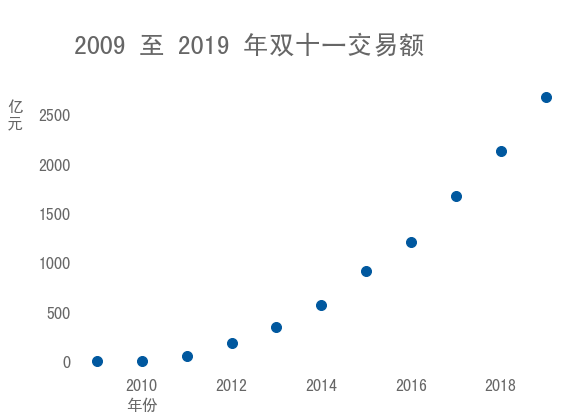

In [7]:
# 定义图片的大小
fig, ax = plt.subplots(figsize=(8, 6))

# 设置标题
ax.set_title('\n2009 至 2019 年双十一交易额\n', loc='left', size=26, color=c['深灰色'])

# 画气泡图
ax.scatter(x, y, s=100, color=c['蓝色'])

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 隐藏刻度线
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])

# 设置坐标轴的标题
ax.text(min(x)+1, -500, '年份', ha='center', fontsize=16, color=c['深灰色'])
ax.text(min(x)-2, 2500, '亿\n元', va='center', fontsize=16, color=c['深灰色'])

plt.show()

### 4. 预测分析

用回归算法进行预测。

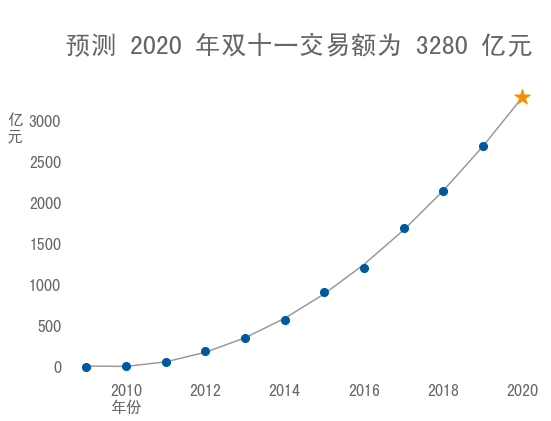

In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# 用管道的方式调用多项式回归算法
poly_reg = Pipeline([
    ('ploy', PolynomialFeatures(degree=2)),
    ('std_scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])
poly_reg.fit(x, y)

# 预测的年份
z = [[2020]]

# 用算法进行预测
predict = poly_reg.predict(z)

# 使用「面向对象」的方法画图，定义图片的大小
fig, ax = plt.subplots(figsize=(8, 6))

# 设置标题
ax.set_title('\n预测 2020 年双十一交易额为' + ' %.0f ' % round(predict[0],0) + '亿元\n', loc='left', size=26, color=c['深灰色'])

# 画气泡图
ax.scatter(x, y, color=c['蓝色'], marker='.', s=260)
ax.scatter(z, predict, color=c['橙色'], marker='*', s=260)

# # 绘制预测线
x2 = np.concatenate([x, z])
y2 = poly_reg.predict(x2)
ax.plot(x2, y2, '-', c=c['灰色'], zorder=-1)

# 隐藏边框
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# 隐藏刻度线
ax.tick_params(axis='x', which='major', length=0)
ax.tick_params(axis='y', which='major', length=0)

# 设置坐标标签字体大小和颜色
ax.tick_params(labelsize=16, colors=c['深灰色'])
ax.text(min(x)-2, 3100, '亿\n元', va='top', fontsize=16, color=c['深灰色'])

# 设置坐标轴的标题
ax.text(min(x)+1, -550, '年份', ha='center', fontsize=16, color=c['深灰色'])

plt.show()